In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
pip install pyextremes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.4 MB/s eta 0:00:00


In [ ]:
from pyextremes import EVA

In [ ]:
cols = ['Year', 'RAINFALL']
df1 = df[cols]

In [ ]:
df1

,Year,RAINFALL
0,1997,3.473554
1,1997,1.803211
2,1997,20.312241
3,1997,0.000000
4,1997,0.000000
...,...,...
15739459,2022,0.000000
15739460,2022,0.000000
15739461,2022,0.000000
15739462,2022,0.000000


In [ ]:
cols_to_read = ['Date', 'RAINFALL']

In [ ]:
data = (
    pd.read_csv("/content/drive/MyDrive/Stats AI ML/csv files/rainfall_subset.csv", usecols = cols_to_read, index_col=1, parse_dates=True, squeeze=True)
    .sort_index(ascending=True)
    .dropna()
)

<ipython-input-77-996907723c66>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  pd.read_csv("/content/drive/MyDrive/Stats AI ML/csv files/rainfall_subset.csv", usecols = cols_to_read, index_col=1, parse_dates=True, squeeze=True)


In [ ]:
data

Date
1997-06-01    3.473554
1997-06-01    0.000000
1997-06-01    0.148640
1997-06-01    0.000000
1997-06-01    0.000000
                ...   
2022-09-30    0.388034
2022-09-30    0.000000
2022-09-30    0.000000
2022-09-30    0.000000
2022-09-30    0.000000
Name: RAINFALL, Length: 15739464, dtype: float64

<Axes: xlabel='Date'>

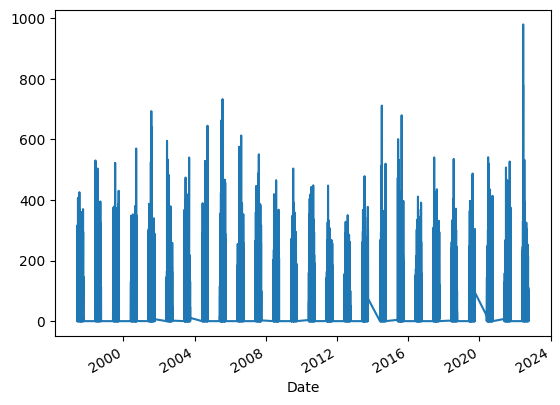

In [ ]:
data.plot()

In [ ]:
model = EVA(data=data)
model

/usr/local/lib/python3.10/dist-packages/pyextremes/eva.py:111: RuntimeWarning: 15,736,292 duplicate indices found in `data` - removing duplicate entries
  warnings.warn(message=message, category=RuntimeWarning)


                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                      RAINFALL      Size:                               3,172
Start:                          June 1997      End:                       September 2022
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

In [ ]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                      RAINFALL      Size:                               3,172
Start:                          June 1997      End:                       September 2022
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 26      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

(<Figure size 768x480 with 1 Axes>, <Axes: xlabel='Date', ylabel='RAINFALL'>)

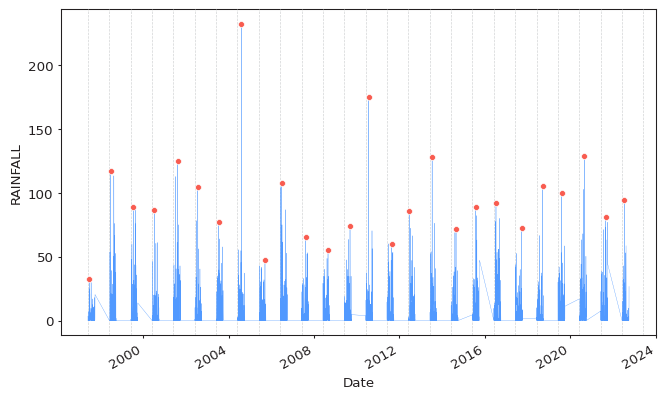

In [ ]:
model.plot_extremes()

In [ ]:
model.fit_model()
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                      RAINFALL      Size:                               3,172
Start:                          June 1997      End:                       September 2022
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 26      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='RAINFALL'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='RAINFALL', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

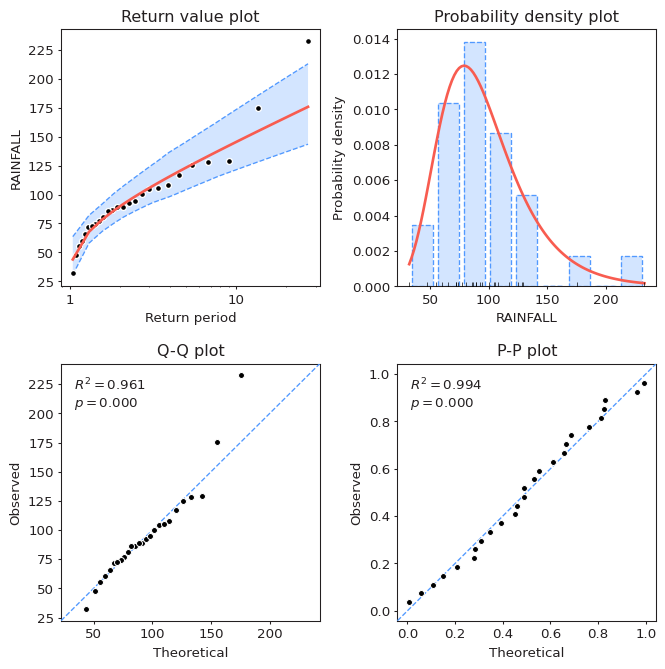

In [ ]:
model.plot_diagnostic(alpha=0.95)

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='Return period', ylabel='RAINFALL'>)

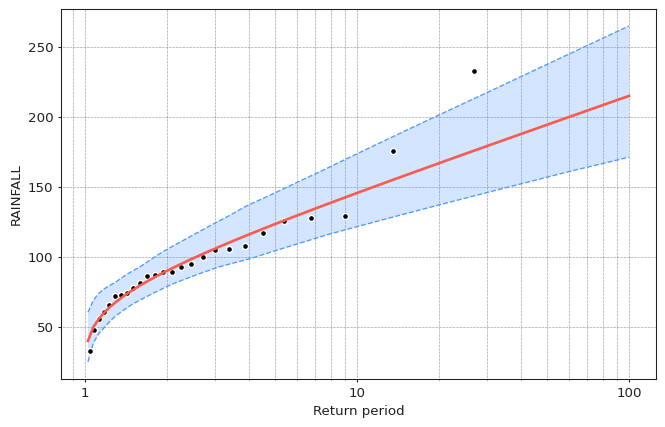

In [ ]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [ ]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,return value,lower ci,upper ci
return period,,,
1.0,-inf,NaN,NaN
2.0,89.890329,77.620270,103.914947
5.0,123.339210,104.455063,145.918954
10.0,145.485280,119.929560,175.079996
25.0,173.466898,138.420455,211.905686
50.0,194.225261,152.689092,238.744645
100.0,214.830347,166.105637,264.626147
250.0,241.960312,184.120745,299.088638
500.0,262.445556,197.289234,325.110514


In [ ]:
import pyextremes
print("pyextremes", pyextremes.__version__)

pyextremes 2.3.2


<Axes: xlabel='Threshold', ylabel='Mean excess'>

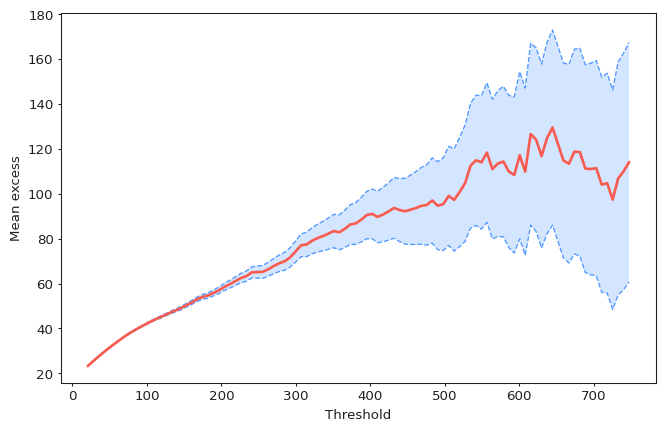

In [ ]:
pyextremes.plot_mean_residual_life(ts=data)

/usr/local/lib/python3.10/dist-packages/pyextremes/eva.py:111: RuntimeWarning: 15,736,292 duplicate indices found in `data` - removing duplicate entries
  warnings.warn(message=message, category=RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/pyextremes/eva.py:111: RuntimeWarning: 15,736,292 duplicate indices found in `data` - removing duplicate entries
  warnings.warn(message=message, category=RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/pyextremes/eva.py:111: RuntimeWarning: 15,736,292 duplicate indices found in `data` - removing duplicate entries
  warnings.warn(message=message, category=RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/pyextremes/eva.py:111: RuntimeWarning: 15,736,292 duplicate indices found in `data` - removing duplicate entries
  warnings.warn(message=message, category=RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/pyextremes/eva.py:111: RuntimeWarning: 15,736,292 duplicate indices found in `data` - removing duplicate entries
  w

<Axes: xlabel='Threshold', ylabel='Return value'>

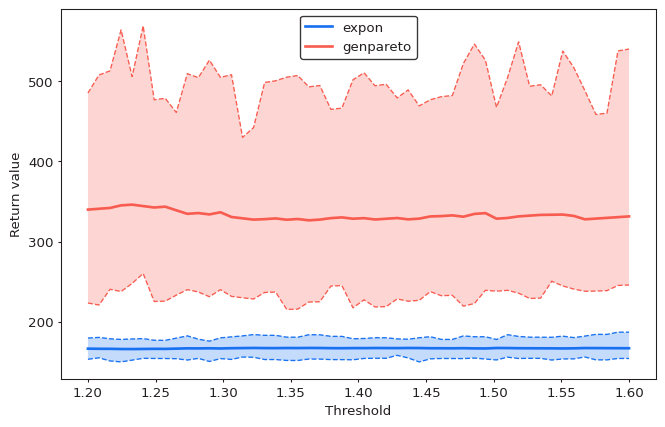

In [ ]:
pyextremes.plot_return_value_stability(
    ts=data,
    return_period=100,
    return_period_size="365.2425D",
    thresholds=np.linspace(1.2, 1.6, 50),
    r="24H",
    extremes_type="high",
    distributions=["genpareto", "expon"],
    alpha=0.95,  # Set to None to get faster results
    #n_samples=100,
)

In [ ]:
from pyextremes import (
    __version__,
    EVA,
    plot_mean_residual_life,
    plot_parameter_stability,
    plot_return_value_stability,
    plot_threshold_stability,
)

/usr/local/lib/python3.10/dist-packages/pyextremes/eva.py:111: RuntimeWarning: 15,736,292 duplicate indices found in `data` - removing duplicate entries
  warnings.warn(message=message, category=RuntimeWarning)


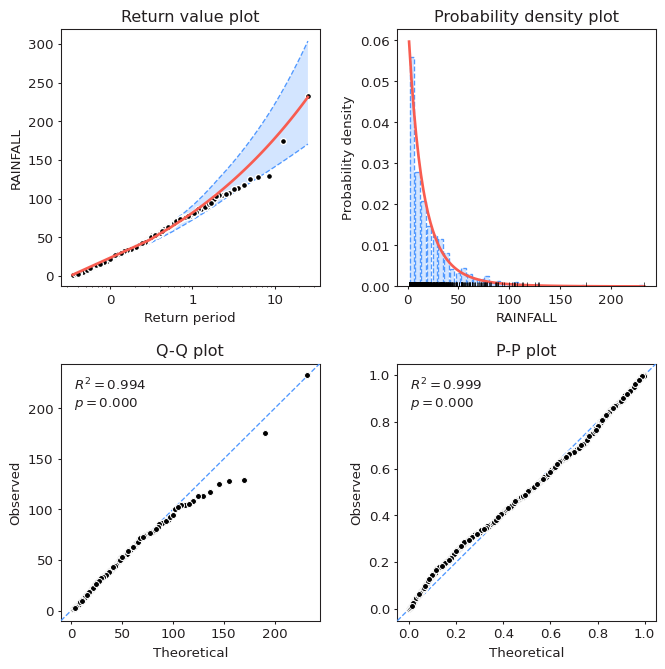

In [ ]:
model = EVA(data)
model.get_extremes("POT", threshold=1.5)
model.fit_model()
fig, ax = model.plot_diagnostic(alpha=0.95)
fig.savefig("selected-threshold-diagnostic.png", dpi=96, bbox_inches="tight")

In [ ]:
model.get_extremes(
    method="POT",
    extremes_type="high",
    threshold = 80
)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                      RAINFALL      Size:                               3,172
Start:                          June 1997      End:                       September 2022
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                    POT
Type:                                high      Threshold:                             80
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

(<Figure size 768x480 with 1 Axes>, <Axes: xlabel='Date', ylabel='RAINFALL'>)

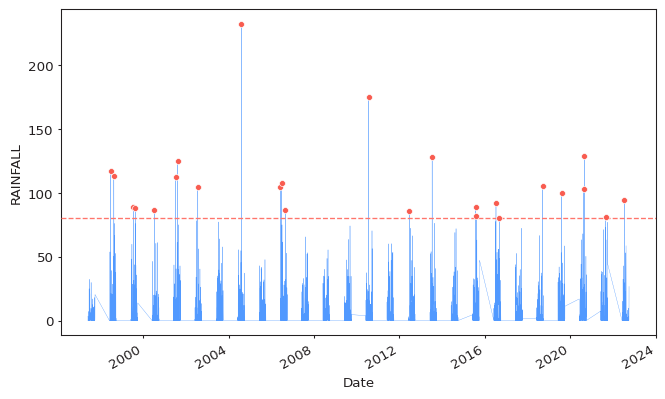

In [ ]:
model.plot_extremes()

In [ ]:
model.fit_model()
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                      RAINFALL      Size:                               3,172
Start:                          June 1997      End:                       September 2022
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                    POT
Type:                                high      Threshold:                             80
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='RAINFALL'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='RAINFALL', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

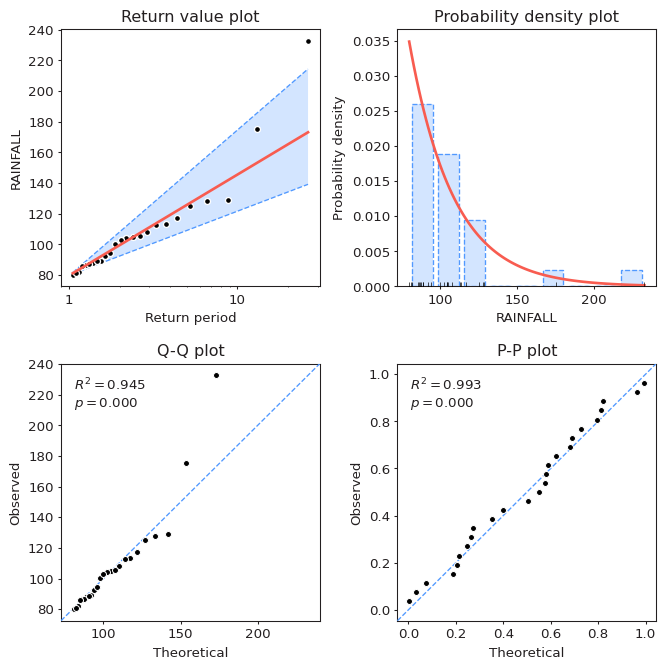

In [ ]:
model.plot_diagnostic(alpha=0.95)

In [ ]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,return value,lower ci,upper ci
return period,,,
1.0,-inf,NaN,NaN
2.0,99.432007,92.189760,109.139400
5.0,125.616777,108.615549,148.404952
10.0,145.424790,121.041179,178.108195
25.0,171.609559,137.466968,217.373746
50.0,191.417573,149.892598,247.076989
100.0,211.225586,162.318228,276.780232
250.0,237.410355,178.744017,316.045783
500.0,257.218369,191.169646,345.749026


<Axes: xlabel='Threshold', ylabel='Mean excess'>

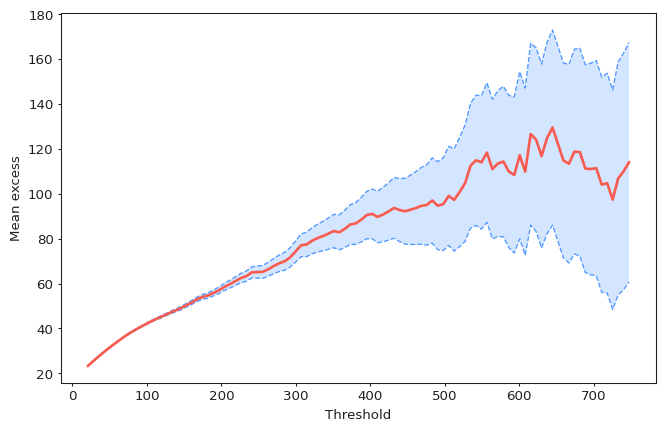

In [ ]:
pyextremes.plot_mean_residual_life(ts=data)